In [1]:
# Importing essential libraries
import os
import pandas as pd
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, explained_variance_score, r2_score,
    mean_poisson_deviance, mean_gamma_deviance, accuracy_score
)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, Dropout, Dense, BatchNormalization, Bidirectional, Conv1D, 
    MaxPooling1D, Flatten
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam

import datetime

# Initialize Plotly for interactive plots
init_notebook_mode(connected=True)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tesla-stock-price/TSLA.csv
/kaggle/input/tesla-stock-price/Tasla_Stock_Updated_V2.csv


# Read The Dataset

In [3]:
df=pd.read_csv('/kaggle/input/tesla-stock-price/Tasla_Stock_Updated_V2.csv')

# Check Head And Tail of the dataset

In [4]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [5]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000
2273,2273,2024-01-16,215.100006,223.490005,212.180099,219.910004,115064708


In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...,...
2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000


In [7]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [8]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


# Now PLots

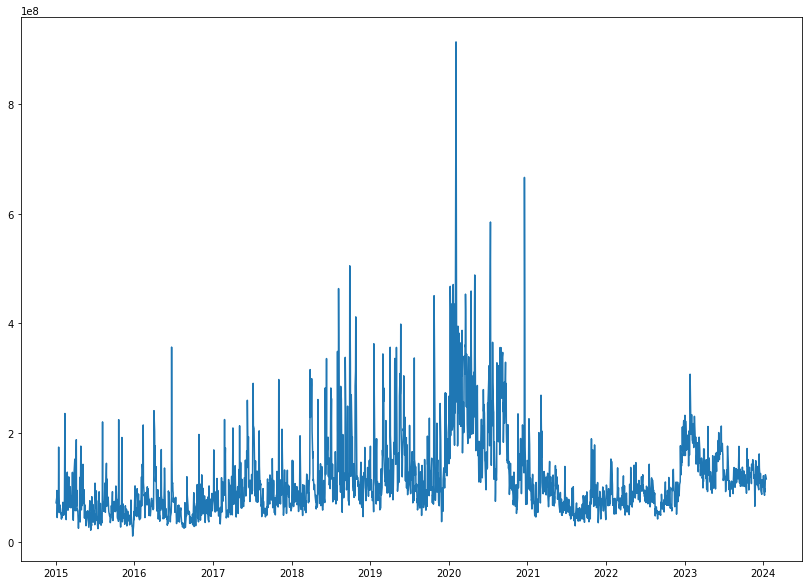

In [10]:
plt.figure(figsize=(14, 10))
plt.plot(df['Volume'])

<AxesSubplot:xlabel='Date'>

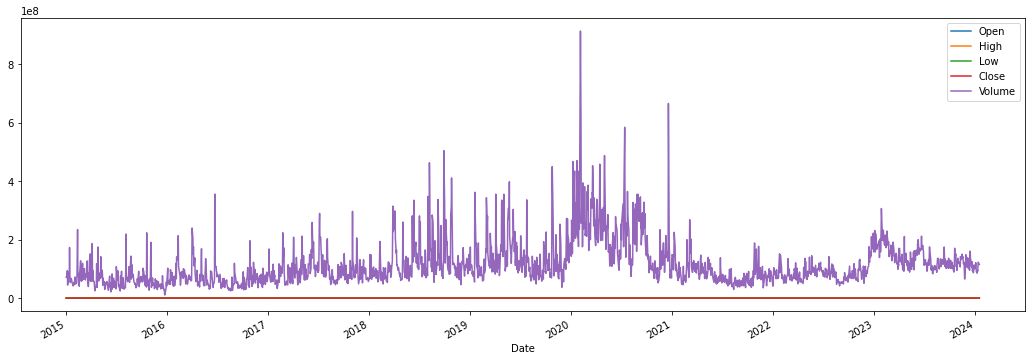

In [11]:
df.plot(figsize=(18,6))

Text(0.5, 1.0, 'TESLA Stock at all time')

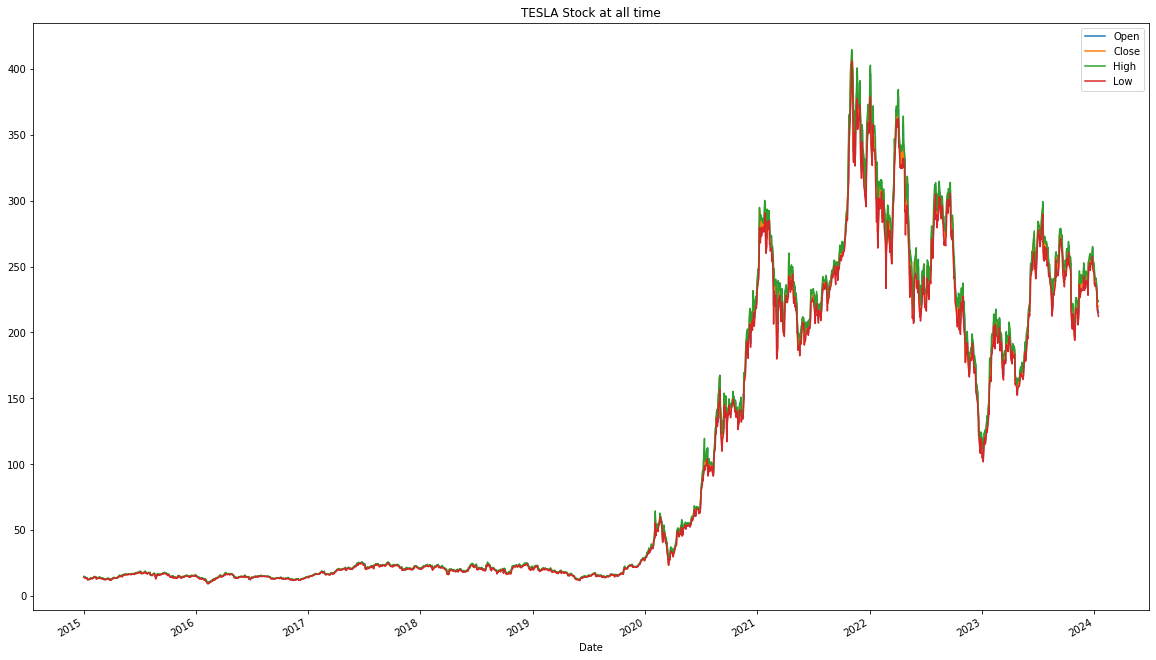

In [12]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('TESLA Stock at all time')

Text(0, 0.5, 'Stock action')

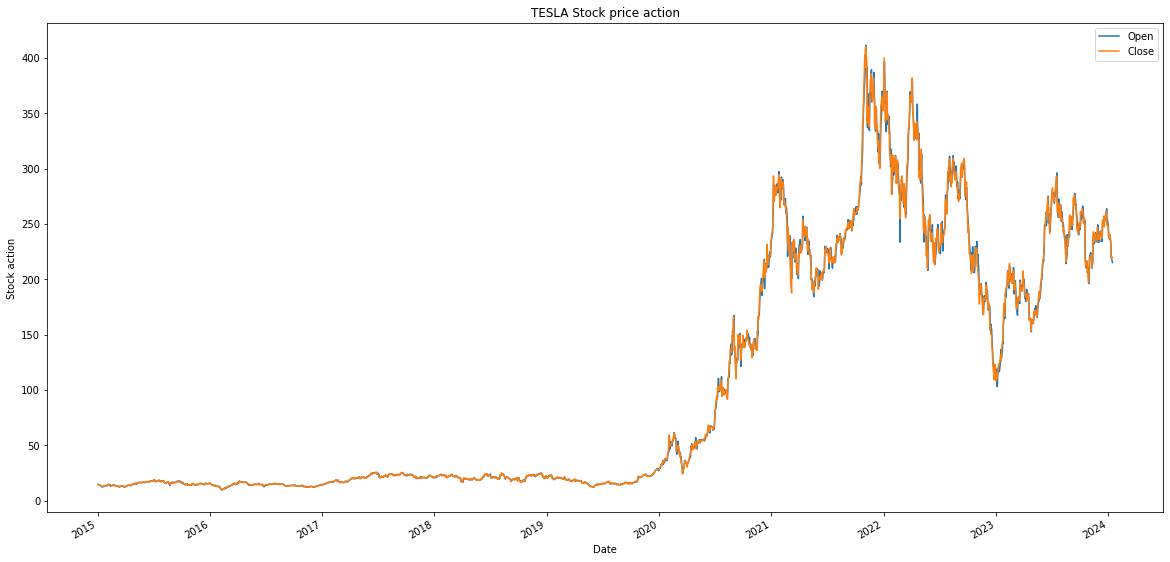

In [13]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

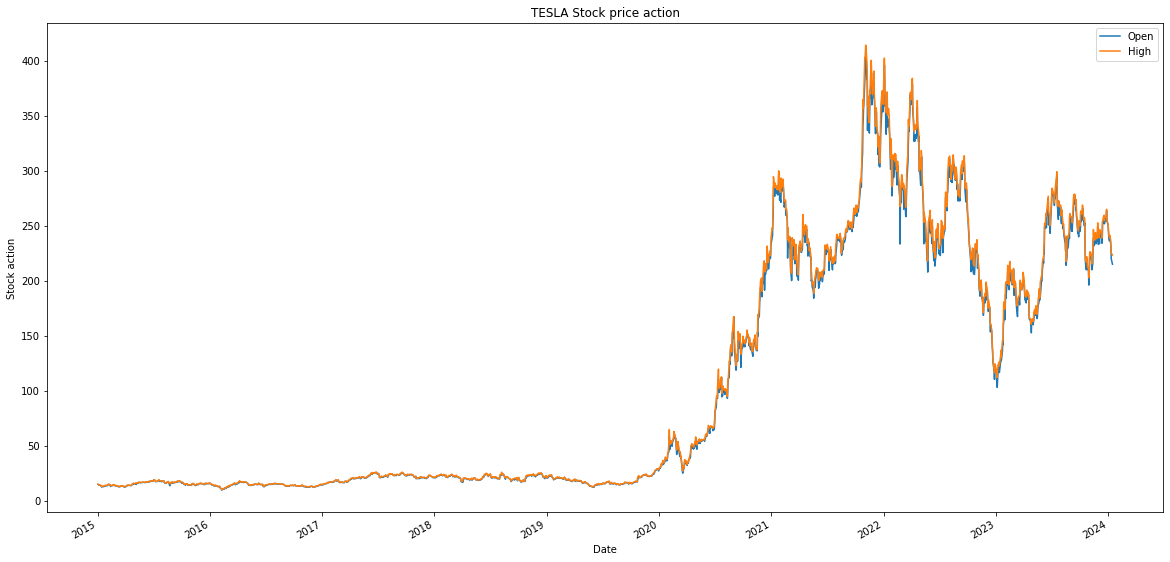

In [14]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

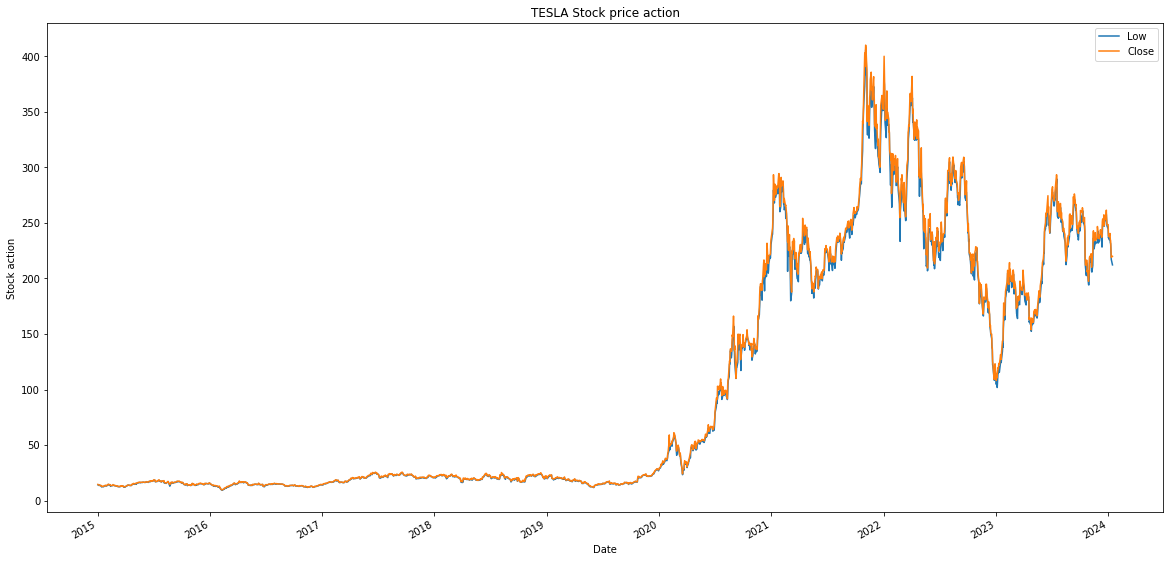

In [15]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

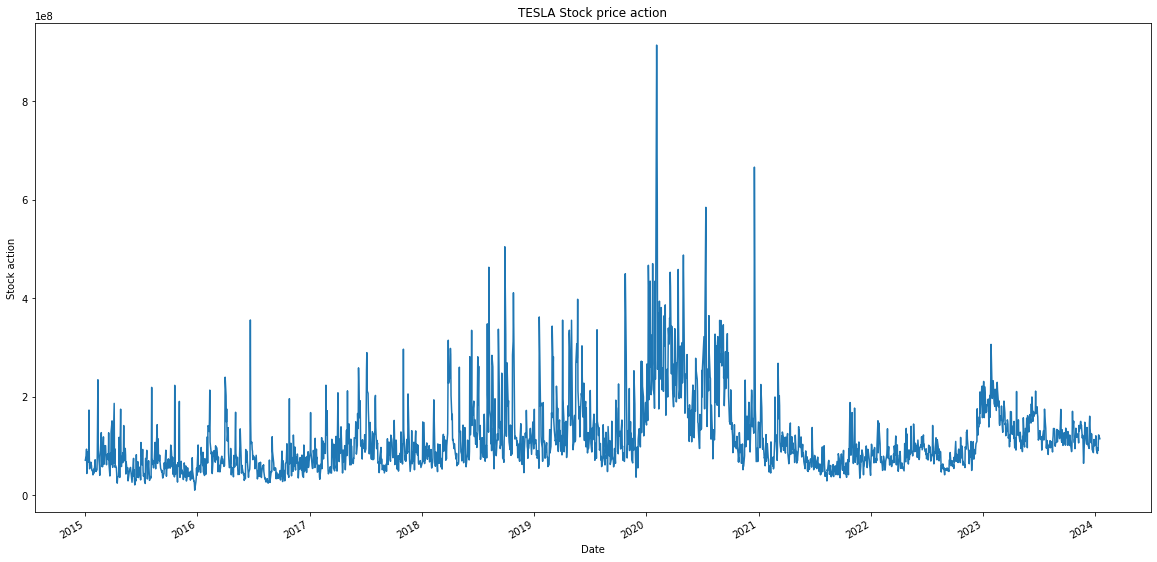

In [16]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

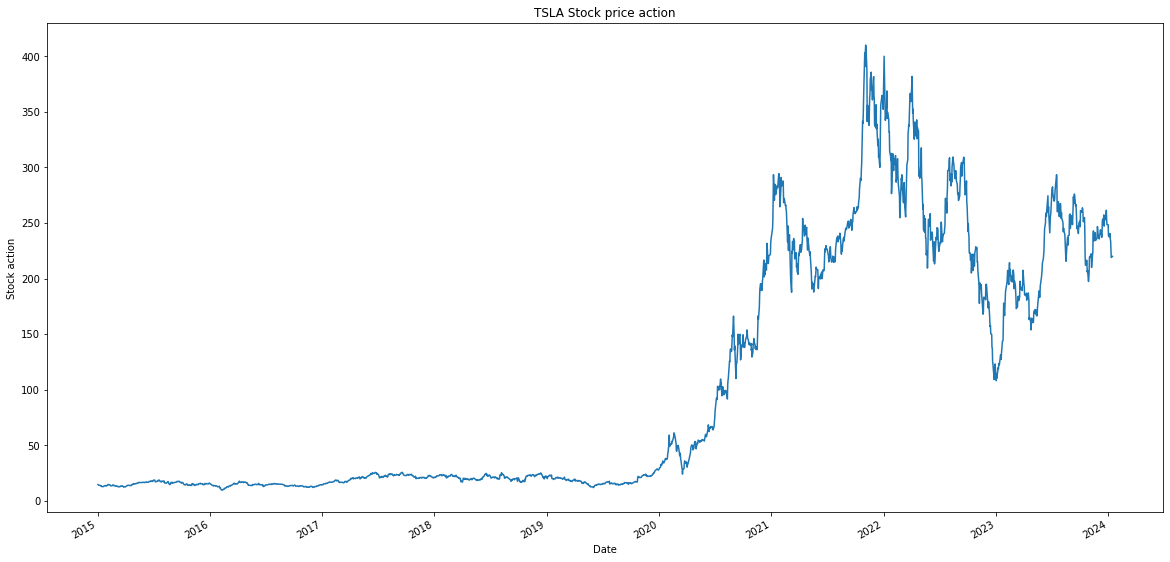

In [17]:
df['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('TSLA Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0.5, 1.0, 'TESLA Stock Price Action form 2013 to 2024')

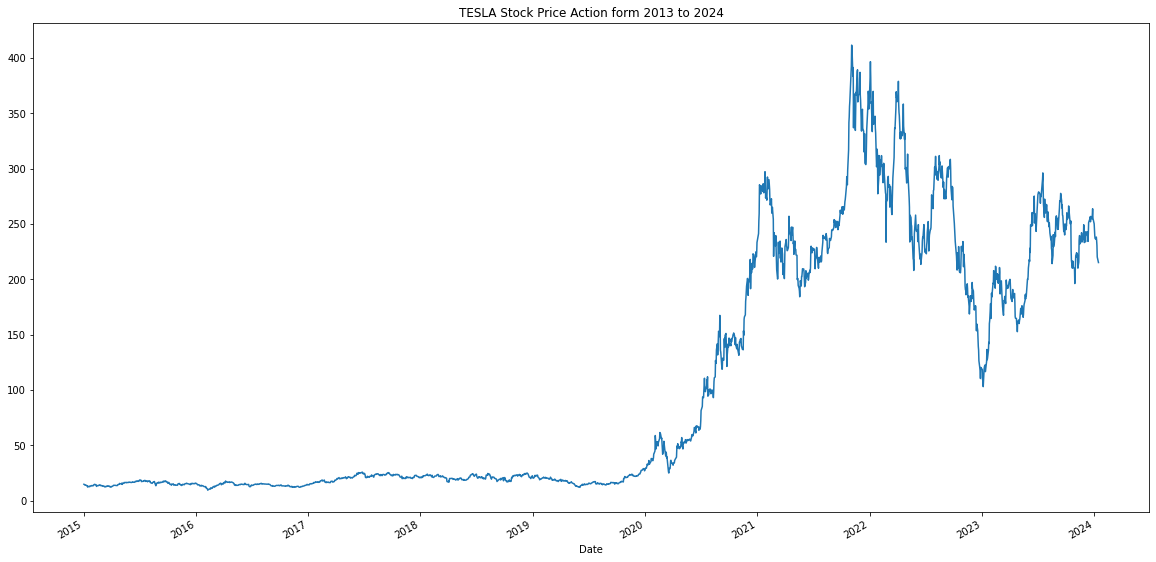

In [18]:
Ama = df['2015':'2024']


Ama['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock Price Action form 2013 to 2024')

Text(0.5, 1.0, 'TESLA Stock Price Action form 2015 to 2024')

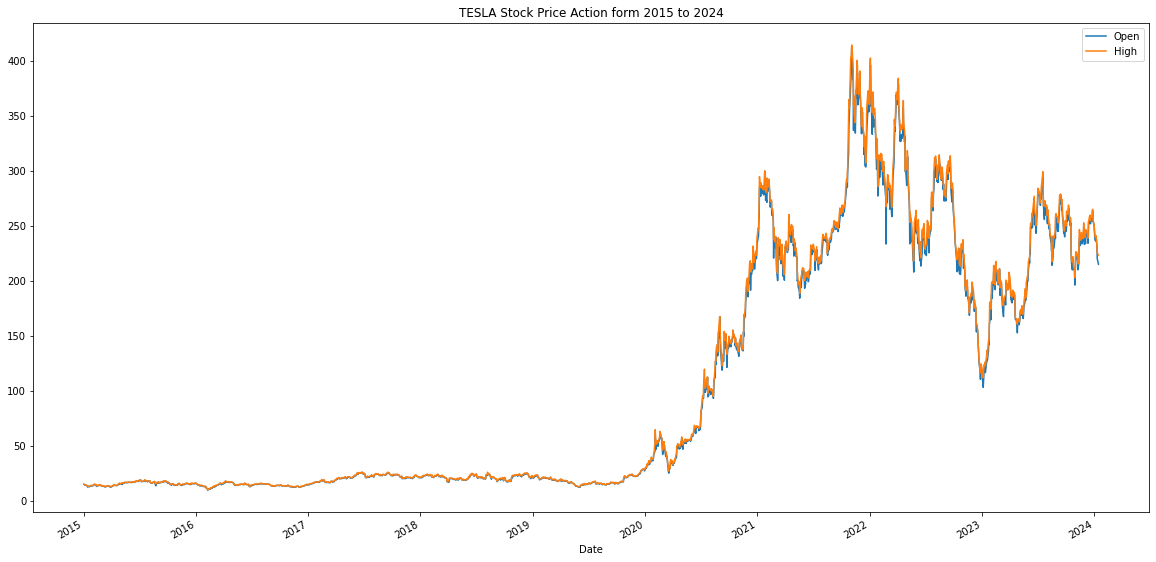

In [19]:
Ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock Price Action form 2015 to 2024')

Text(0.5, 1.0, 'TESLA Stock Price Action form 2015 to 2024')

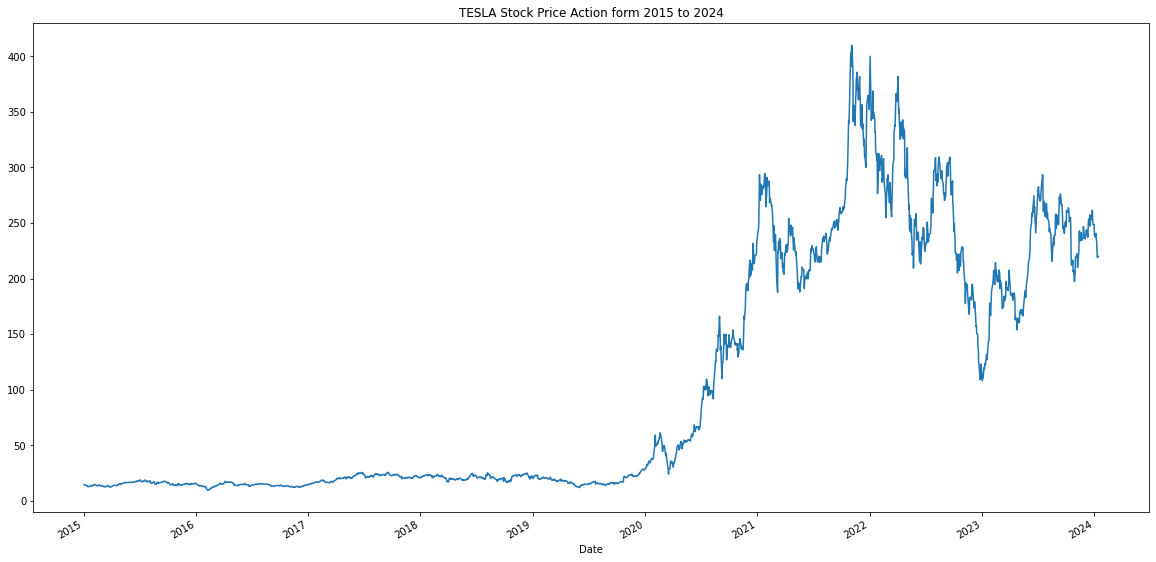

In [20]:
Ama['Close'].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock Price Action form 2015 to 2024')

Text(0.5, 1.0, 'TESLA Stock Price Action form 2015 to 2024')

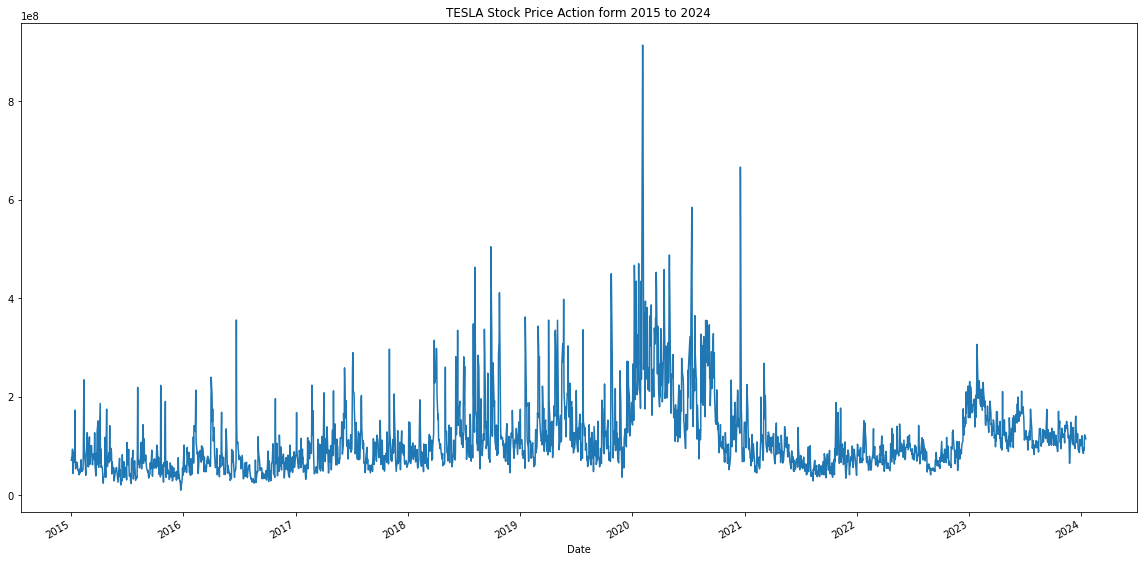

In [21]:
Ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('TESLA Stock Price Action form 2015 to 2024')

In [22]:
Ama.describe()

,Open,High,Low,Close,Volume
count,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


# Augmented Dickey Fuller Test (ADF)
ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [24]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -1.150079
p-value                           0.694694
#Lags Used                       27.000000
Number of Observations Used    2246.000000
Critical Value (1%)              -3.433265
Critical Value (5%)              -2.862828
Critical Value (10%)             -2.567456
dtype: float64
None


In [25]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                 -1.129396
p-value                         0.703208
#Lags Used                     10.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -2.399346
p-value                         0.141921
#Lags Used                      9.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64
None


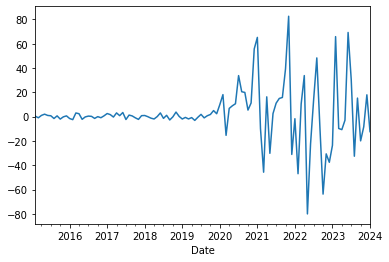

In [26]:
Ama_diff = Ama['Open'].resample('MS').mean() - Ama['Open'].resample('MS').mean().shift(1)
Ama_open_diff = Ama_diff.dropna()
Ama_open_diff.plot()

print(adf_test(Ama_open_diff))

# Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
another test for checking the stationarity of a time series

In [27]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [28]:
kpss_test(Ama['High'])

Results of KPSS Test:
Test Statistic            5.841427
p-value                   0.010000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Date'>

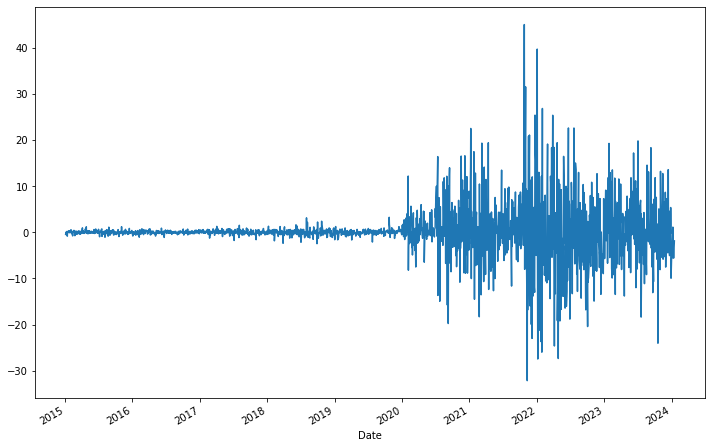

In [29]:
Ama["High_diff"] = Ama["High"] - Ama["High"].shift(1)
Ama["High_diff"].dropna().plot(figsize=(12, 8))

In [30]:
kpss_test(Ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.067982
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [31]:
kpss_test(Ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.094041
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [32]:
kpss_test(Ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.214376
p-value                  0.010000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2012: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [33]:
adf_test(Ama['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -9.395753e+00
p-value                        6.381356e-16
#Lags Used                     2.600000e+01
Number of Observations Used    2.246000e+03
Critical Value (1%)           -3.433265e+00
Critical Value (5%)           -2.862828e+00
Critical Value (10%)          -2.567456e+00
dtype: float64


# Data Preprocessing

In [34]:
train_Ama = Ama['High'].iloc[:-4]

X_train=[]
y_train=[]

for i in range(2, len(train_Ama)):
    X_train.append(train_Ama[i-2:i])
    y_train.append(train_Ama[i])

# 80% Training and 20% Testing

In [35]:
import math
train_len = math.ceil(len(train_Ama)*0.8)
train_len

1816

In [36]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Creating LSTM Model

In [37]:
# Function to create a more complex LSTM model
def create_complex_lstm_model(input_shape, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    # First LSTM layer with Batch Normalization
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    # Second LSTM layer
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(dropout_rate))
    # Third LSTM layer
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(1))
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [38]:
# X_train and y_train are already defined
input_shape = (X_train.shape[1], 1)
model = create_complex_lstm_model(input_shape)

# Model Summary

In [39]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 100)            40800     
_________________________________________________________________
batch_normalization (BatchNo (None, 2, 100)            400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [40]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [41]:
# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2, validation_split=0.15, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
31/31 - 6s - loss: 18361.3535 - val_loss: 48395.7109
Epoch 2/100
31/31 - 0s - loss: 15829.0225 - val_loss: 40126.8047
Epoch 3/100
31/31 - 0s - loss: 12929.6816 - val_loss: 30226.4688
Epoch 4/100
31/31 - 0s - loss: 10001.1758 - val_loss: 20448.2559
Epoch 5/100
31/31 - 0s - loss: 6949.8237 - val_loss: 11955.2393
Epoch 6/100
31/31 - 0s - loss: 4549.4409 - val_loss: 8310.0791
Epoch 7/100
31/31 - 0s - loss: 3042.3711 - val_loss: 2628.9568
Epoch 8/100
31/31 - 0s - loss: 1965.6199 - val_loss: 1333.9553
Epoch 9/100
31/31 - 0s - loss: 1382.0709 - val_loss: 2367.7007
Epoch 10/100
31/31 - 0s - loss: 1178.7006 - val_loss: 1015.3706
Epoch 11/100
31/31 - 0s - loss: 936.4595 - val_loss: 1109.8815
Epoch 12/100
31/31 - 0s - loss: 846.8921 - val_loss: 163.1462
Epoch 13/100
31/31 - 0s - loss: 705.5895 - val_loss: 131.1378
Epoch 14/100
31/31 - 0s - loss: 740.9615 - val_loss: 98.8196
Epoch 15/100
31/31 - 0s - loss: 647.8856 - val_loss: 388.5298
Epoch 16/100
31/31 - 0s - loss: 674.4524 - val_los

# Plotting the Loss

<AxesSubplot:>

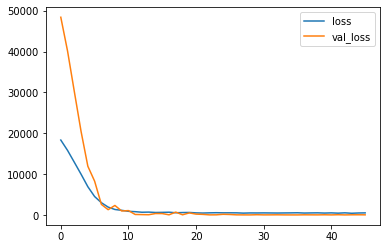

In [42]:
# Plotting loss
losses = pd.DataFrame(history.history)
losses[['loss', 'val_loss']].plot()

# Prepare the validation data

In [43]:
# Prepare the validation data
test_data = train_Ama[train_len-2:]
X_val, Y_val = [], [] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [44]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Making predictions

In [45]:
# Making predictions
predictions = model.predict(X_val)

# Know the model error accuracy | the model accuracy 

In [46]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 7.284032995312517
Validation rmse: 8.806343289454997


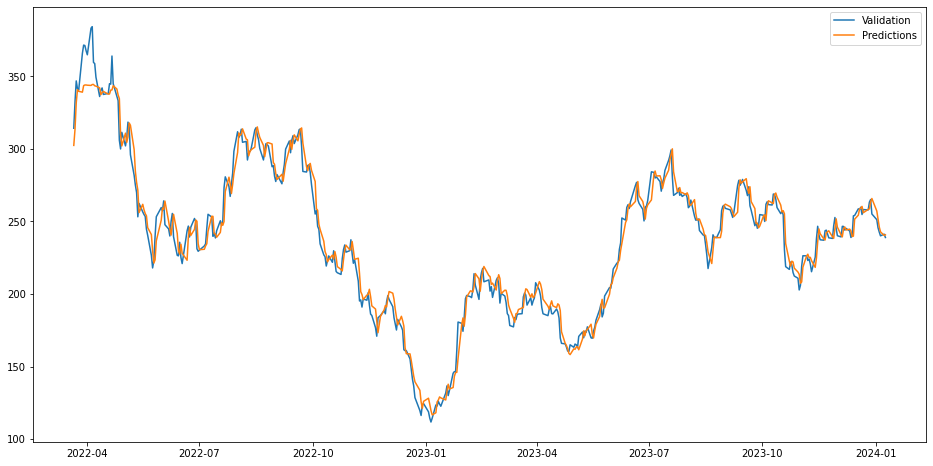

In [47]:
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

# DataFrame to see the percentage of error between real and predicted


In [48]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,454.000000
mean,-0.815297
std,8.778195
min,-28.718994
25%,-5.992783
50%,-1.023621
75%,3.588428
max,39.864899


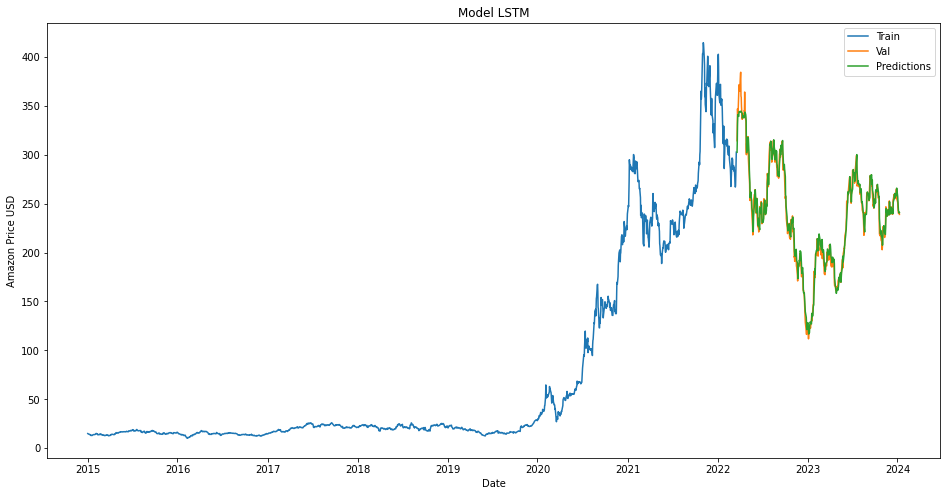

In [49]:
train = train_Ama[:train_len]
valid = pd.DataFrame(train_Ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

# Prepare Input Data for Forecasting

In [50]:
forecast_input = X_val[-1:]

# Generate Predictions for Next 30 Days

In [51]:
def forecast_next_days(model, initial_data, days_to_predict=30):
    prediction_list = initial_data.tolist()  # Convert to list

    for _ in range(days_to_predict):
        x = np.array(prediction_list[-2:]).reshape(1, 2, 1)
        next_prediction = model.predict(x)[0, 0]
        prediction_list.append(next_prediction.item())

    return prediction_list[2:]

# Generate predictions
next_30_days = forecast_next_days(model, forecast_input.flatten(), 30)

# Append Predictions to Existing Data

In [52]:
# Add these predictions to 'valid' DataFrame
last_date = valid.index[-1]  # Last date in your existing data
new_dates = pd.date_range(start=last_date, periods=31, closed='right')  # 30 new dates after the last date
new_predictions = pd.DataFrame(next_30_days, index=new_dates, columns=['Predictions'])

# Concatenate with the existing 'valid' DataFrame
extended_valid = pd.concat([valid, new_predictions])

# Plot the Results Using Plotly

In [53]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot original data
fig.add_trace(go.Scatter(x=valid.index, y=valid['High'], mode='lines', name='Actual High'))

# Plot predictions (including the next 30 days)
fig.add_trace(go.Scatter(x=extended_valid.index, y=extended_valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Tesla Price Forecast', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

# If You Like This Notebook Please Upvote It.